In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv('Salaries.csv')
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [7]:
data_columns = ['rank','discipline','yrs.since.phd','sex','yrs.service','salary']

In [7]:
data = data [data_columns].copy()

In [11]:
salary_df = data.rename({'rank':"rank",'discipline':'Discipline','yrs.since.phd':'yrs_since_phd','yrs.service':'yrs_service','sex':'sex','salary':'salary'},axis=1)

In [12]:
salary_df.head()

,rank,Discipline,yrs_since_phd,yrs_service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [15]:
rank_dict = {'AsstProf' : 1, 'AssocProf' : 2, 'Prof' : 3}
salary_df['rank'] =salary_df['rank'].map(rank_dict)

In [16]:
salary_df = pd.get_dummies(salary_df, drop_first=True)

In [17]:
df2=salary_df.copy()

In [18]:
df2.head()

,rank,yrs_since_phd,yrs_service,salary,Discipline_B,sex_Male
0,3,19,18,139750,1,1
1,3,20,16,173200,1,1
2,1,4,3,79750,1,1
3,3,45,39,115000,1,1
4,3,40,41,141500,1,1


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
df2.isnull().sum()

rank             0
yrs_since_phd    0
yrs_service      0
salary           0
Discipline_B     0
sex_Male         0
dtype: int64

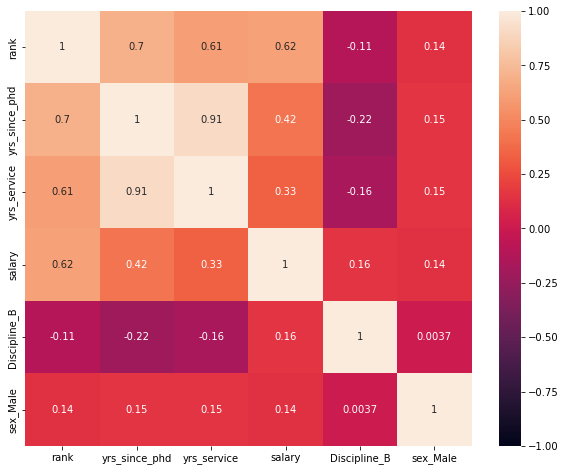

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),annot=True, vmin = -1.0,vmax = 1.0)
plt.show()

In [22]:
df2.dtypes

rank             int64
yrs_since_phd    int64
yrs_service      int64
salary           int64
Discipline_B     uint8
sex_Male         uint8
dtype: object

In [23]:
y = salary_df["yrs_service"]
X = salary_df.drop('yrs_service',axis=1)

In [24]:
y

0      18
1      16
2       3
3      39
4      41
       ..
392    30
393    19
394    25
395    15
396     4
Name: yrs_service, Length: 397, dtype: int64

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [27]:
X

,rank,yrs_since_phd,salary,Discipline_B,sex_Male
0,1.0,0.327273,0.471668,1.0,1.0
1,1.0,0.345455,0.664192,1.0,1.0
2,0.0,0.054545,0.126335,1.0,1.0
3,1.0,0.800000,0.329218,1.0,1.0
4,1.0,0.709091,0.481740,1.0,1.0
...,...,...,...,...,...
392,1.0,0.581818,0.260761,0.0,1.0
393,1.0,0.545455,0.533909,0.0,1.0
394,1.0,0.745455,0.252888,0.0,1.0
395,1.0,0.436364,0.216000,0.0,1.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [29]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
print(f'Regression R2: {model.score(X_test,y_test)}')

Regression R2: 0.8127246169631578
